In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load(subject_acron, subject):
    results_path = 'evaluador/results/Results_graded_%s.xlsx'%subject_acron
    results_df = pd.read_excel(results_path, dtype = str)
    results_df['date'] = pd.to_datetime(results_df['start_date'], errors='coerce')
    return results_df[results_df['subject'].isin([subject])]

In [3]:
results_AIS = load("AIS", "Ampliación de Ingeniería del Software")
results_DAD = load("DAD", "Desarrollo de Aplicaciones Distribuidas")
results_DAW = load("DAW", "Desarrollo de Aplicaciones Web")
results_ED = load("EDII", "Estructura de datos II")
results_PL = load("PL", "Lenguajes de Programación - Haskell")
results_df = pd.concat([results_AIS, results_DAD, results_DAW, results_ED, results_PL])

In [4]:
#grouped_questions = ["Pregunta corta", "Pregunta de explicar código", "Pregunta de escribir código"]
grouped_questions = ["Short Questions", "Interpreting source code questions", "Code writing questions"]
def group_questions(question):
    if question in ["Pregunta 1", "Pregunta 2"]: return grouped_questions[0]
    if question in ["Pregunta 3", "Pregunta 4"]: return grouped_questions[1]
    if question in ["Pregunta 5", "Pregunta 6"]: return grouped_questions[2]
results_df['question_grouped'] = results_df['question'].apply(group_questions)

In [5]:
print("Total answers:    ", len(results_df))
print("Grade (Buena):    ", len(results_df[results_df['grade']=="Buena"]) / len(results_df))
print("Grade (No-Buena): ", len(results_df[results_df['grade']!="Buena"]) / len(results_df))
print("Grade (Regular):  ", len(results_df[results_df['grade']=="Regular"]) / len(results_df))
print("Grade (Mala):     ", len(results_df[results_df['grade']=="Mala"]) / len(results_df))
print("Copy-paste        ", len(results_df[results_df['copy_paste']=="True"]) / len(results_df))
print("Misunderstood     ", len(results_df[results_df['misunderstood']=="True"]) / len(results_df))
print("Bad IA Answer     ", len(results_df[results_df['bad_ia_answer']=="True"]) / len(results_df))
# La mayoría de bad IA Answer es porque considero que la respuesta no es completa

Total answers:     527
Grade (Buena):     0.5882352941176471
Grade (No-Buena):  0.4117647058823529
Grade (Regular):   0.20872865275142316
Grade (Mala):      0.2030360531309298
Copy-paste         0.38519924098671726
Misunderstood      0.026565464895635674
Bad IA Answer      0.16888045540796964


In [6]:
colors = {
    'Buena':  'limegreen',
    'Regular': 'orange', 
    'Mala': 'orangered'
}

In [7]:
def rating_pieChart(question, ax):
    df = results_df[results_df['question_grouped']==question].groupby(['grade']).count()
    df.plot.pie(
        y='question_grouped', ylabel='', autopct='%1.1f%%',
        title="%s"%(question), labels=None,
        ax=ax, legend=False, colors=[colors[name] for name in df.index]
    )
    if question == "Pregunta corta": ax.legend(df.index,loc='lower center', bbox_to_anchor=(0, 0, 0, 0))

In [8]:
plt.rcParams.update({'font.size': 14})

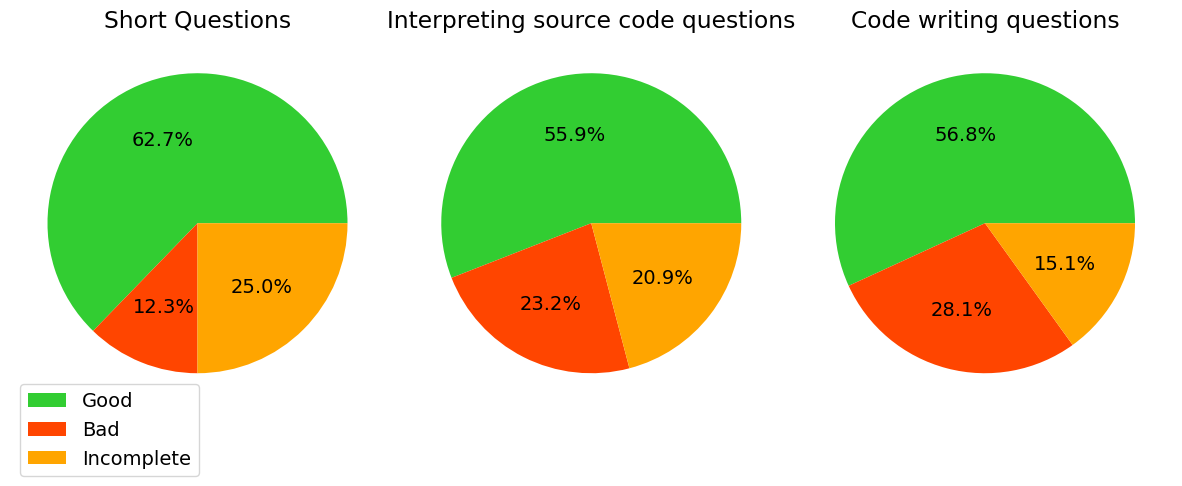

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10))
fig.subplots_adjust(hspace=0.5, wspace=0.05)
col=0
for question in grouped_questions:
    rating_pieChart(question, axes[col])
    col+=1
axes[0].legend([
            "Good", 
            "Bad",
            "Incomplete", 
        ],loc='lower left',bbox_to_anchor=(0, -0.2, 0, 0))
plt.savefig('grade_question_type.png', bbox_inches='tight')